/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.


<AxesSubplot:>

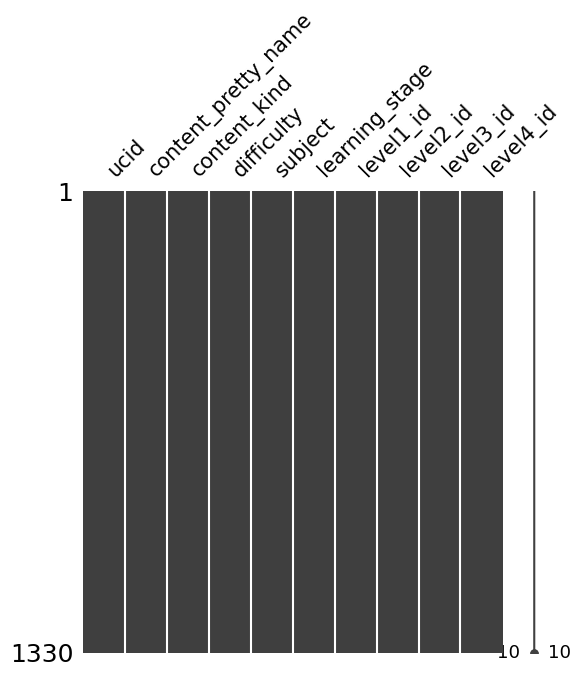

In [1]:
# Required packages
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import missingno as msno
from plotnine import *
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load Datasets
content = pd.read_csv('/kaggle/input/learning-activity-public-dataset-by-junyi-academy/Info_Content.csv')
users = pd.read_csv('/kaggle/input/learning-activity-public-dataset-by-junyi-academy/Info_UserData.csv')
problem = pd.read_csv('/kaggle/input/learning-activity-public-dataset-by-junyi-academy/Log_Problem.csv')

msno.matrix(content, figsize=(6,6), fontsize=15)


<AxesSubplot:>

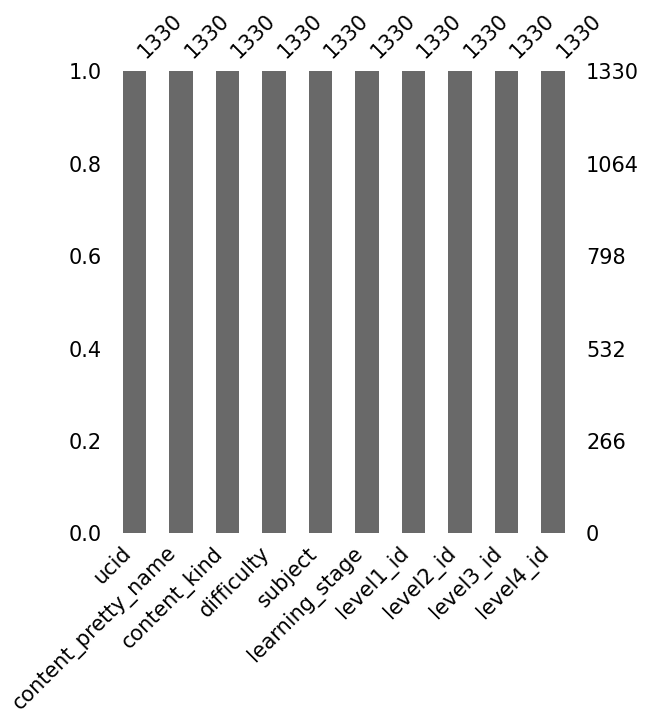

In [2]:
msno.bar(content, figsize=(6,6), fontsize=15)

<AxesSubplot:>

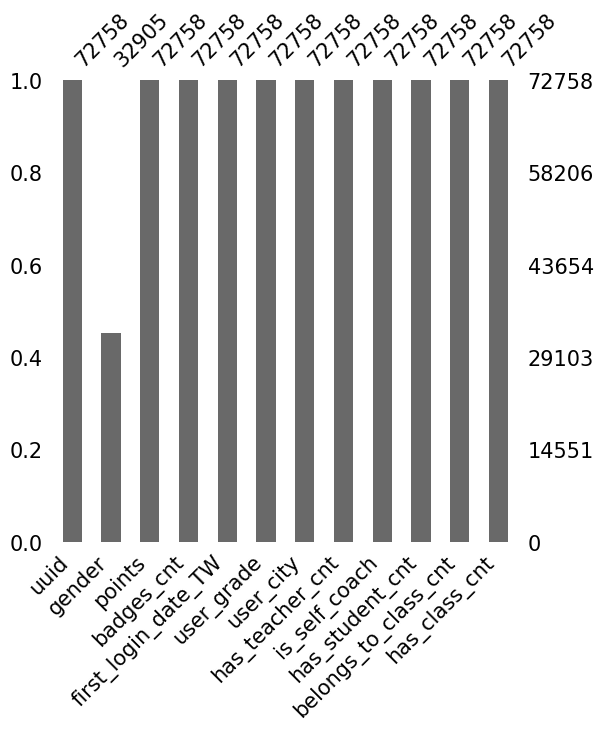

In [3]:
msno.bar(users, figsize=(6,6), fontsize=15)

<AxesSubplot:>

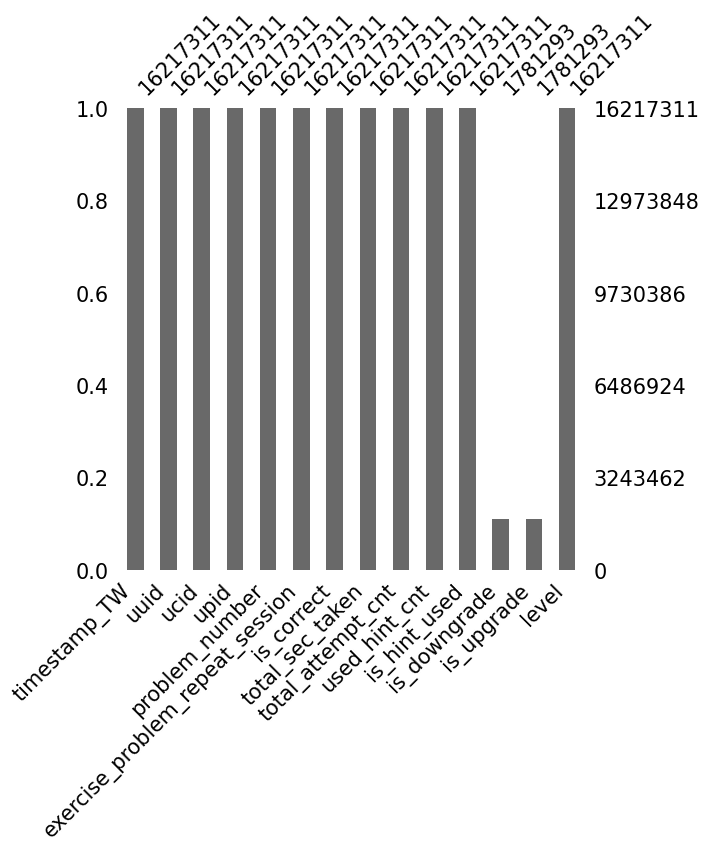

In [4]:
msno.bar(problem, figsize=(6,6), fontsize=15)

<AxesSubplot:>

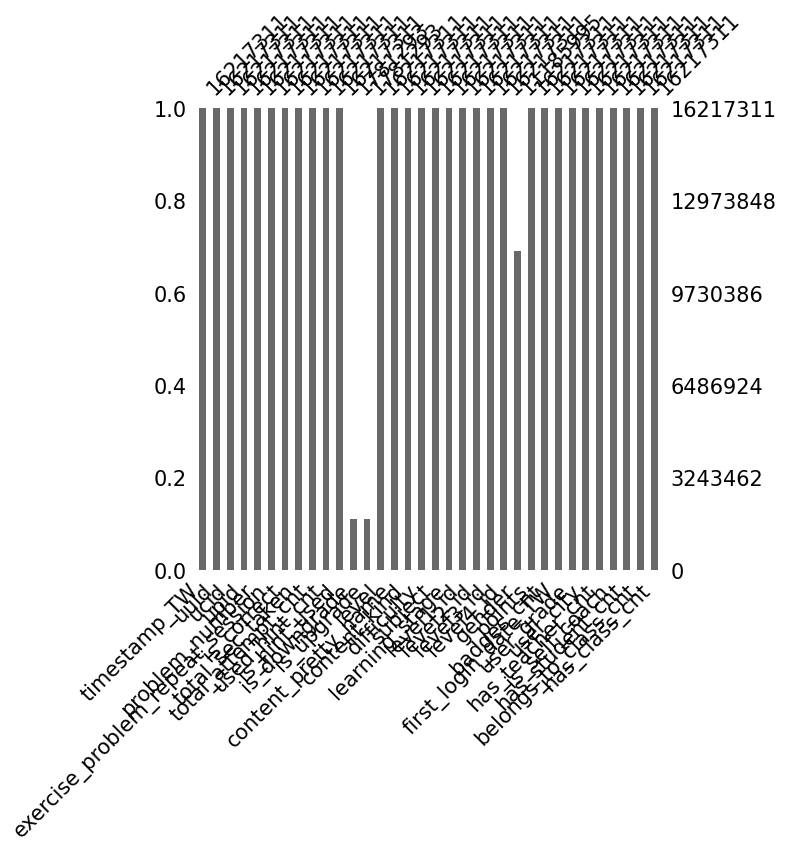

In [5]:
temp=pd.merge(problem,content,on='ucid',how='left')
joined=pd.merge(temp, users, on='uuid', how='left')
msno.bar(joined, figsize=(6,6), fontsize=15)

In [6]:
# write to csv file with combined tables
pd.DataFrame(joined).to_csv('/kaggle/working/joined.csv')

In [7]:
# download joined.csv
from IPython.display import FileLink
FileLink(r'joined.csv')

/kaggle/working/joined.csv

11809119
2352668
996819
751424
307281
131500579926705


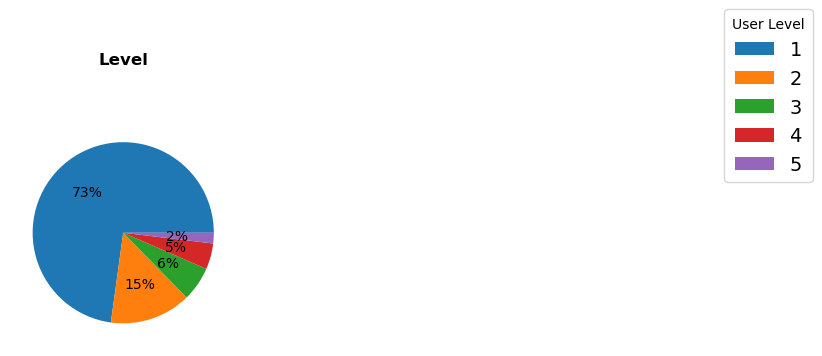

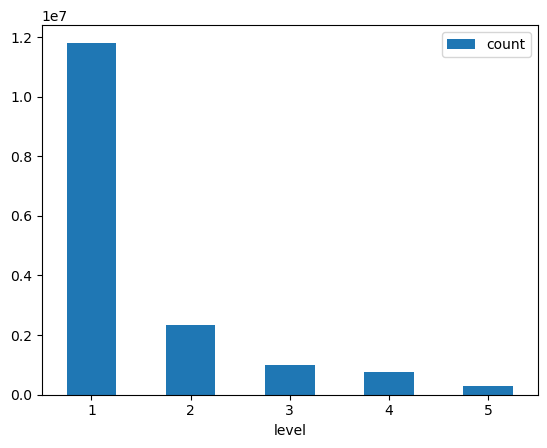

In [8]:
joined_sum=sum(joined.index)
level0_num = len(joined[joined.level==0].index)
level1_num = len(joined[joined.level==1].index)
level2_num = len(joined[joined.level==2].index)
level3_num = len(joined[joined.level==3].index)
level4_num = len(joined[joined.level==4].index)

print(level0_num)
print(level1_num)
print(level2_num)
print(level3_num)
print(level4_num)
print(joined_sum)
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(321)
ax1.pie([level0_num/joined_sum,level1_num/joined_sum,level2_num/joined_sum,level3_num/joined_sum,level4_num/joined_sum],autopct='%.0f%%')
ax1.set_title("Level", fontdict={'fontweight':"bold"}, pad=40)
fig.legend(labels=['1', '2', '3', '4', '5'], title="User Level",prop={'size': 14})
plt.show()

df = pd.DataFrame({'level':['1', '2', '3', '4', '5'], 'count':[level0_num,level1_num,level2_num,level3_num,level4_num]})
ax = df.plot.bar(x='level', y='count', rot=0)

